In [1]:
#import dependencies
from jax.config import config
config.update("jax_enable_x64", True)
import jax.numpy as jnp

import numpy as np
import matplotlib.pyplot as plt
#from tensorflow_probability.substrates.jax.internal.dtype_util


import pandas as pd
data = pd.read_pickle('/home/dkn16/data.pkl')
FGnopol = data.beam.foregrounds.all_nopol
FGpol = data.beam.foregrounds.pleak
HI = data.beam.HI
noise = data.beam.noise
freqs = data.freqs

In [3]:
dim = 256
freqs = 256

#resize the training data
cosmos = jnp.array(HI+noise)[0:dim,0:dim,0:freqs].astype(jnp.float64)
cosmos = cosmos - jnp.mean(cosmos,axis=(0,1))
cosmos = cosmos[:,:,:]

pred_HGP = np.mean(np.load('/scratch/dkn16/result_hgp_pol.npy'),axis=0)*1000 # read results of all models
pred_HGP_nopol = np.mean(np.load('/scratch/dkn16/result_hgp_nopol.npy'),axis=0)*1000
pred_CP = np.load('/scratch/dkn16/result_CP.npy')*1000
pred_CP_nopol = np.load('/scratch/dkn16/result_CP_nopol.npy')*1000

pred_NP = np.mean(np.load('/scratch/dkn16/result_np_pol_suppix1.npy'),axis=0)*1000

pred_NP_nopol = pred_NP #just a placeholder

/home/dkn16/.local/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


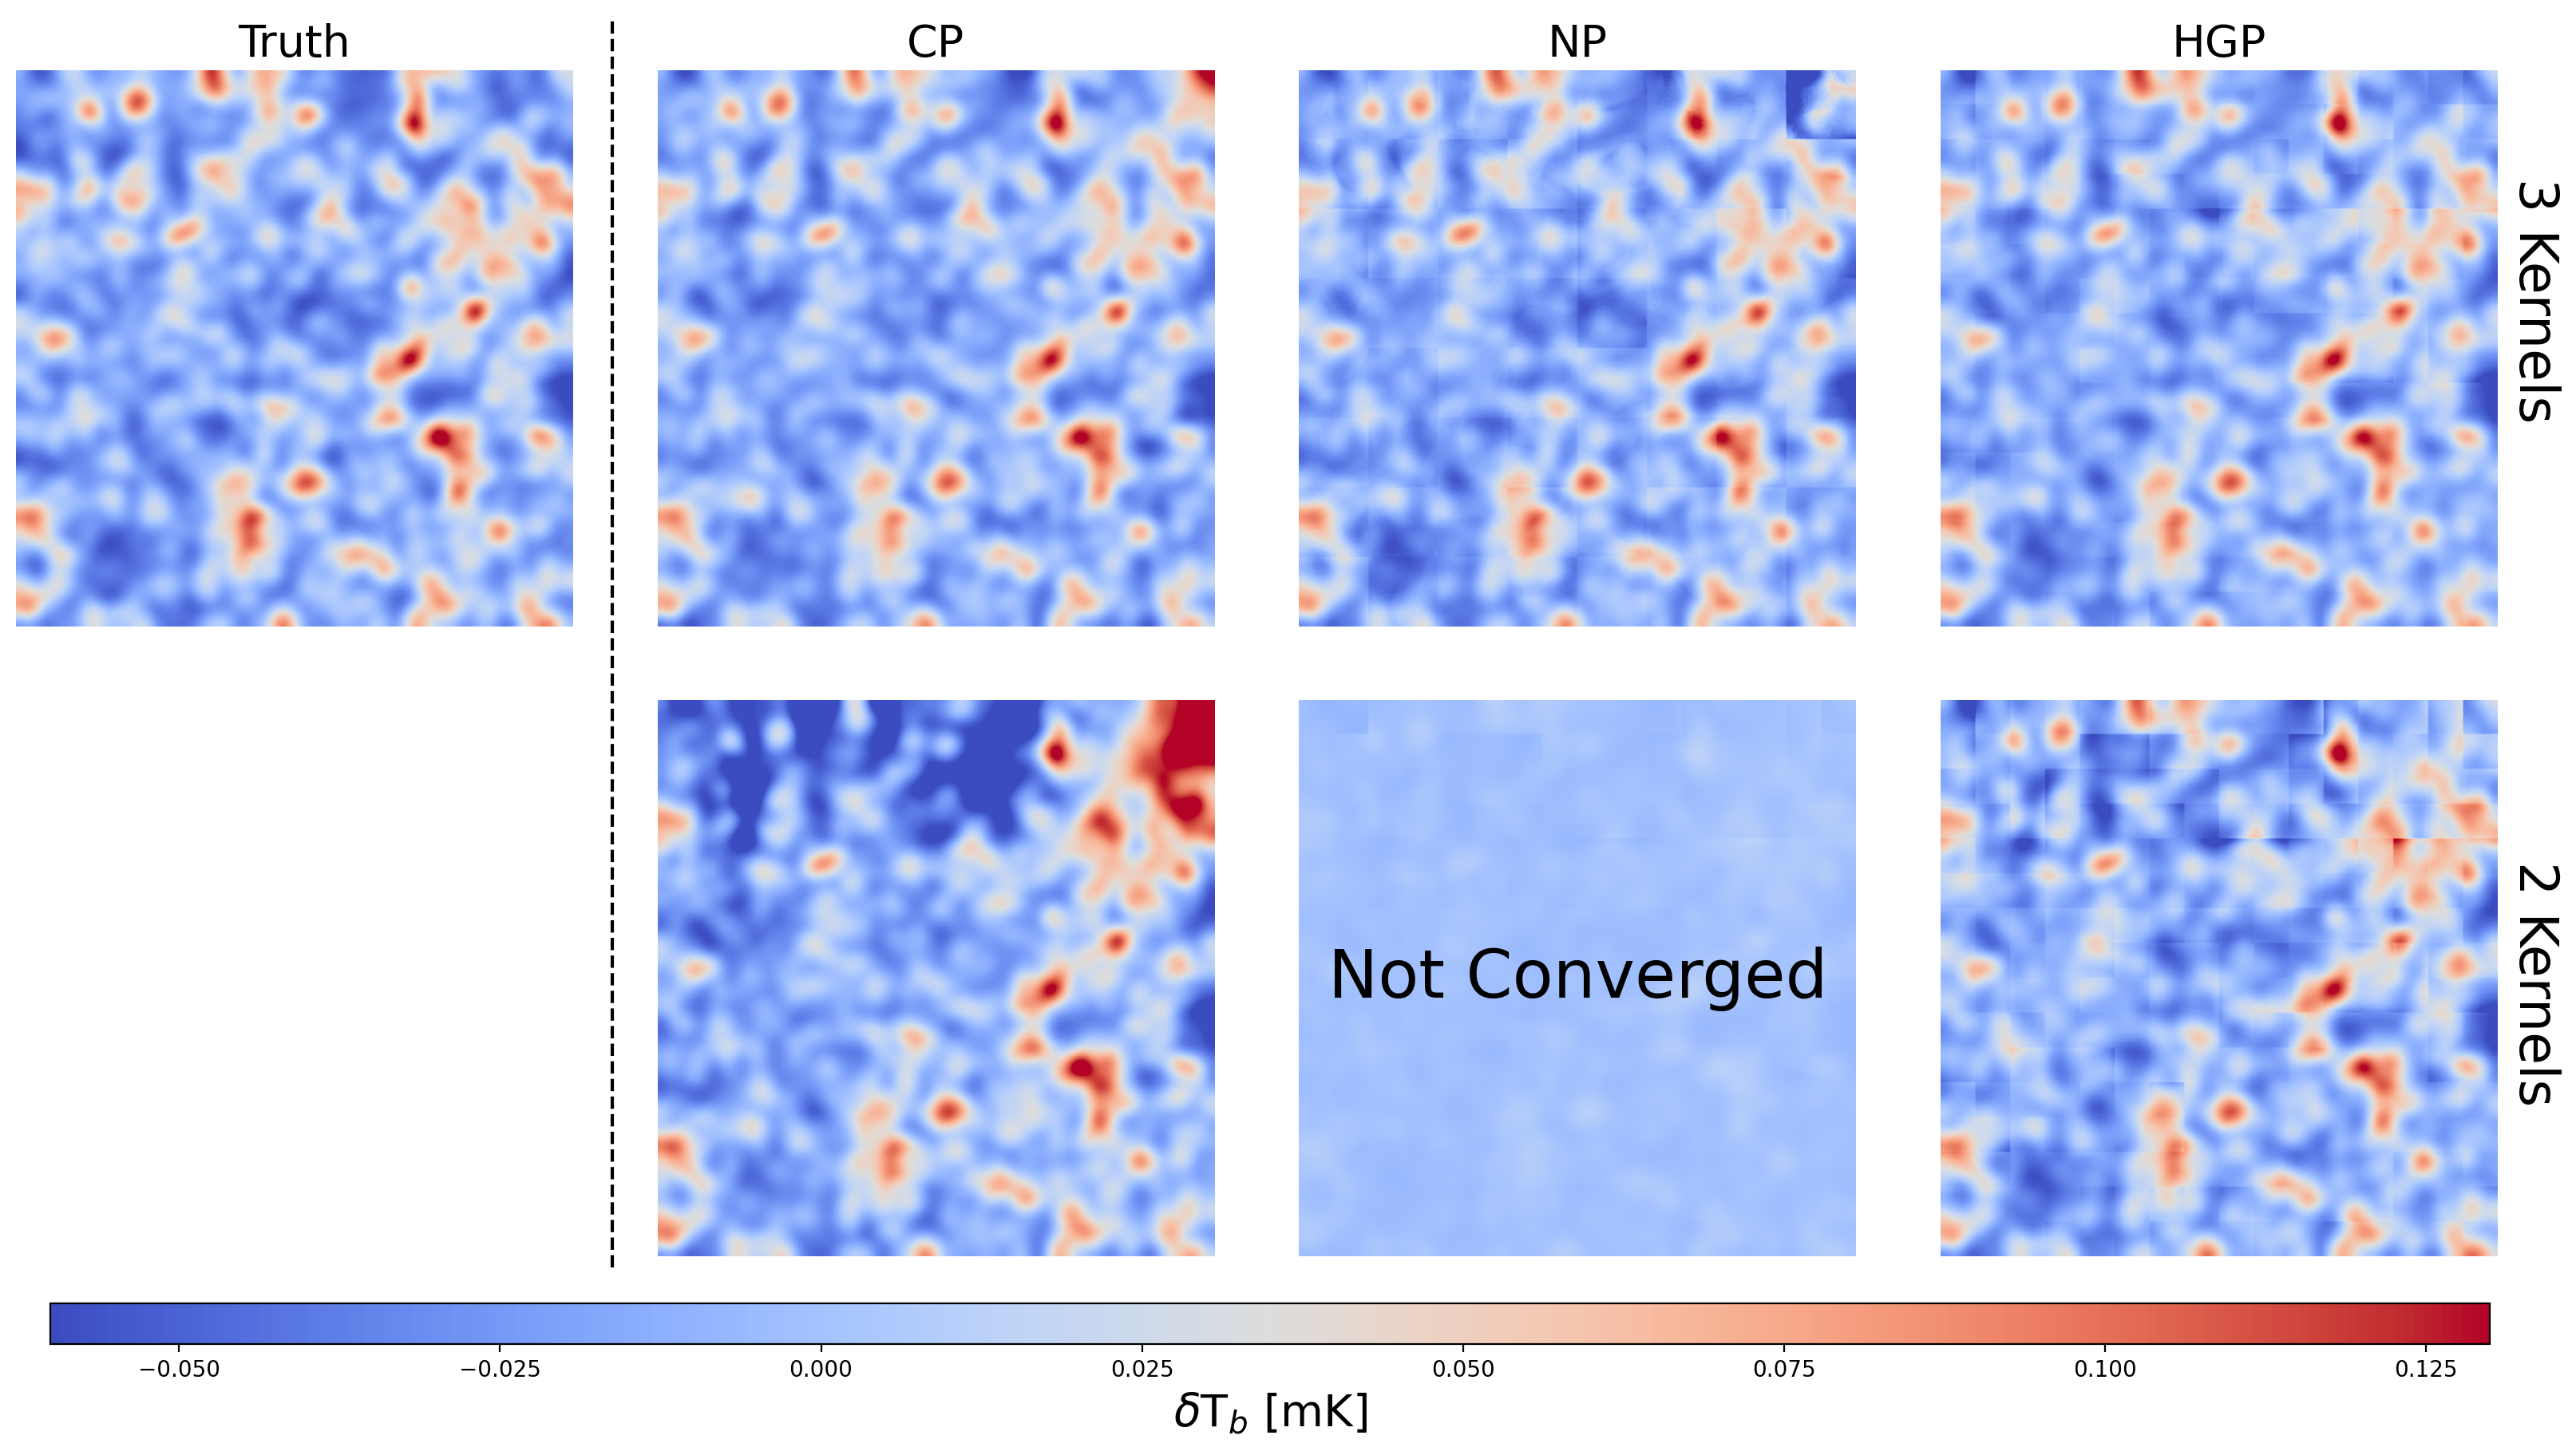

In [4]:
import matplotlib.lines as lines
fig = plt.figure(figsize=(16,8),dpi=200)
idx=120
cmap='coolwarm'
ax1 = plt.subplot(241)

im1 = plt.imshow(cosmos[:,:,idx],vmin=-0.06,vmax=0.13,cmap=cmap)

plt.title('Truth',fontsize=20)
plt.axis('off')

ax2 = plt.subplot(242)
plt.imshow(pred_CP[:,:,idx],vmin=-0.06,vmax=0.13,cmap=cmap)
plt.title('CP',fontsize=20)
plt.axis('off')

plt.subplot(243)
plt.imshow(pred_NP[:,:,idx],vmin=-0.06,vmax=0.13,cmap=cmap)
plt.title('NP',fontsize=20)
plt.axis('off')

plt.subplot(244)
plt.imshow(pred_HGP[:,:,idx],vmin=-0.06,vmax=0.13,cmap=cmap)
plt.title('HGP',fontsize=20)
plt.axis('off')

plt.subplot(246)
plt.imshow(pred_CP_nopol[:,:,idx],vmin=-0.06,vmax=0.13,cmap=cmap)
plt.axis('off')

ax = plt.subplot(247)
ax.imshow(pred_NP_nopol[:,:,idx]*0.1,vmin=-0.06,vmax=0.13,cmap=cmap)
ax.text(128, 128, 'Not Converged',
        fontsize=30, color='black', ha = 'center',va =  'center')
ax.axis('off')


plt.subplot(248)
plt.imshow(pred_HGP_nopol[:,:,idx],vmin=-0.06,vmax=0.13,cmap=cmap)
plt.axis('off')

plt.figtext(0.99,0.68,'3 Kernels',fontsize=24,rotation=270)
plt.figtext(0.99,0.145,'2 Kernels',fontsize=24,rotation=270)

l = 0.028
b = -0.05
w = 0.955
h = 0.032
#对应 l,b,w,h；设置colorbar位置；
rect = [l,b,w,h] 
cbar_ax = fig.add_axes(rect)
cbar=fig.colorbar(im1,cax = cbar_ax,orientation='horizontal')
cbar.set_label(r"$\delta$T$_{b}$ [mK]",fontsize=20)

# Calculating the position for the vertical line
# This depends on the layout of your subplots
left, right = ax1.get_position().bounds[2], ax2.get_position().bounds[0]
xline = left + (right - left) / 2

# Adding the line to the figure, not the axes
line = lines.Line2D([xline, xline], [0.01, 0.99], transform=fig.transFigure, color="black", linestyle="--")
fig.add_artist(line)

plt.tight_layout(h_pad=3.5)
#plt.savefig('Recovery.pdf',dpi=500,bbox_inches='tight')

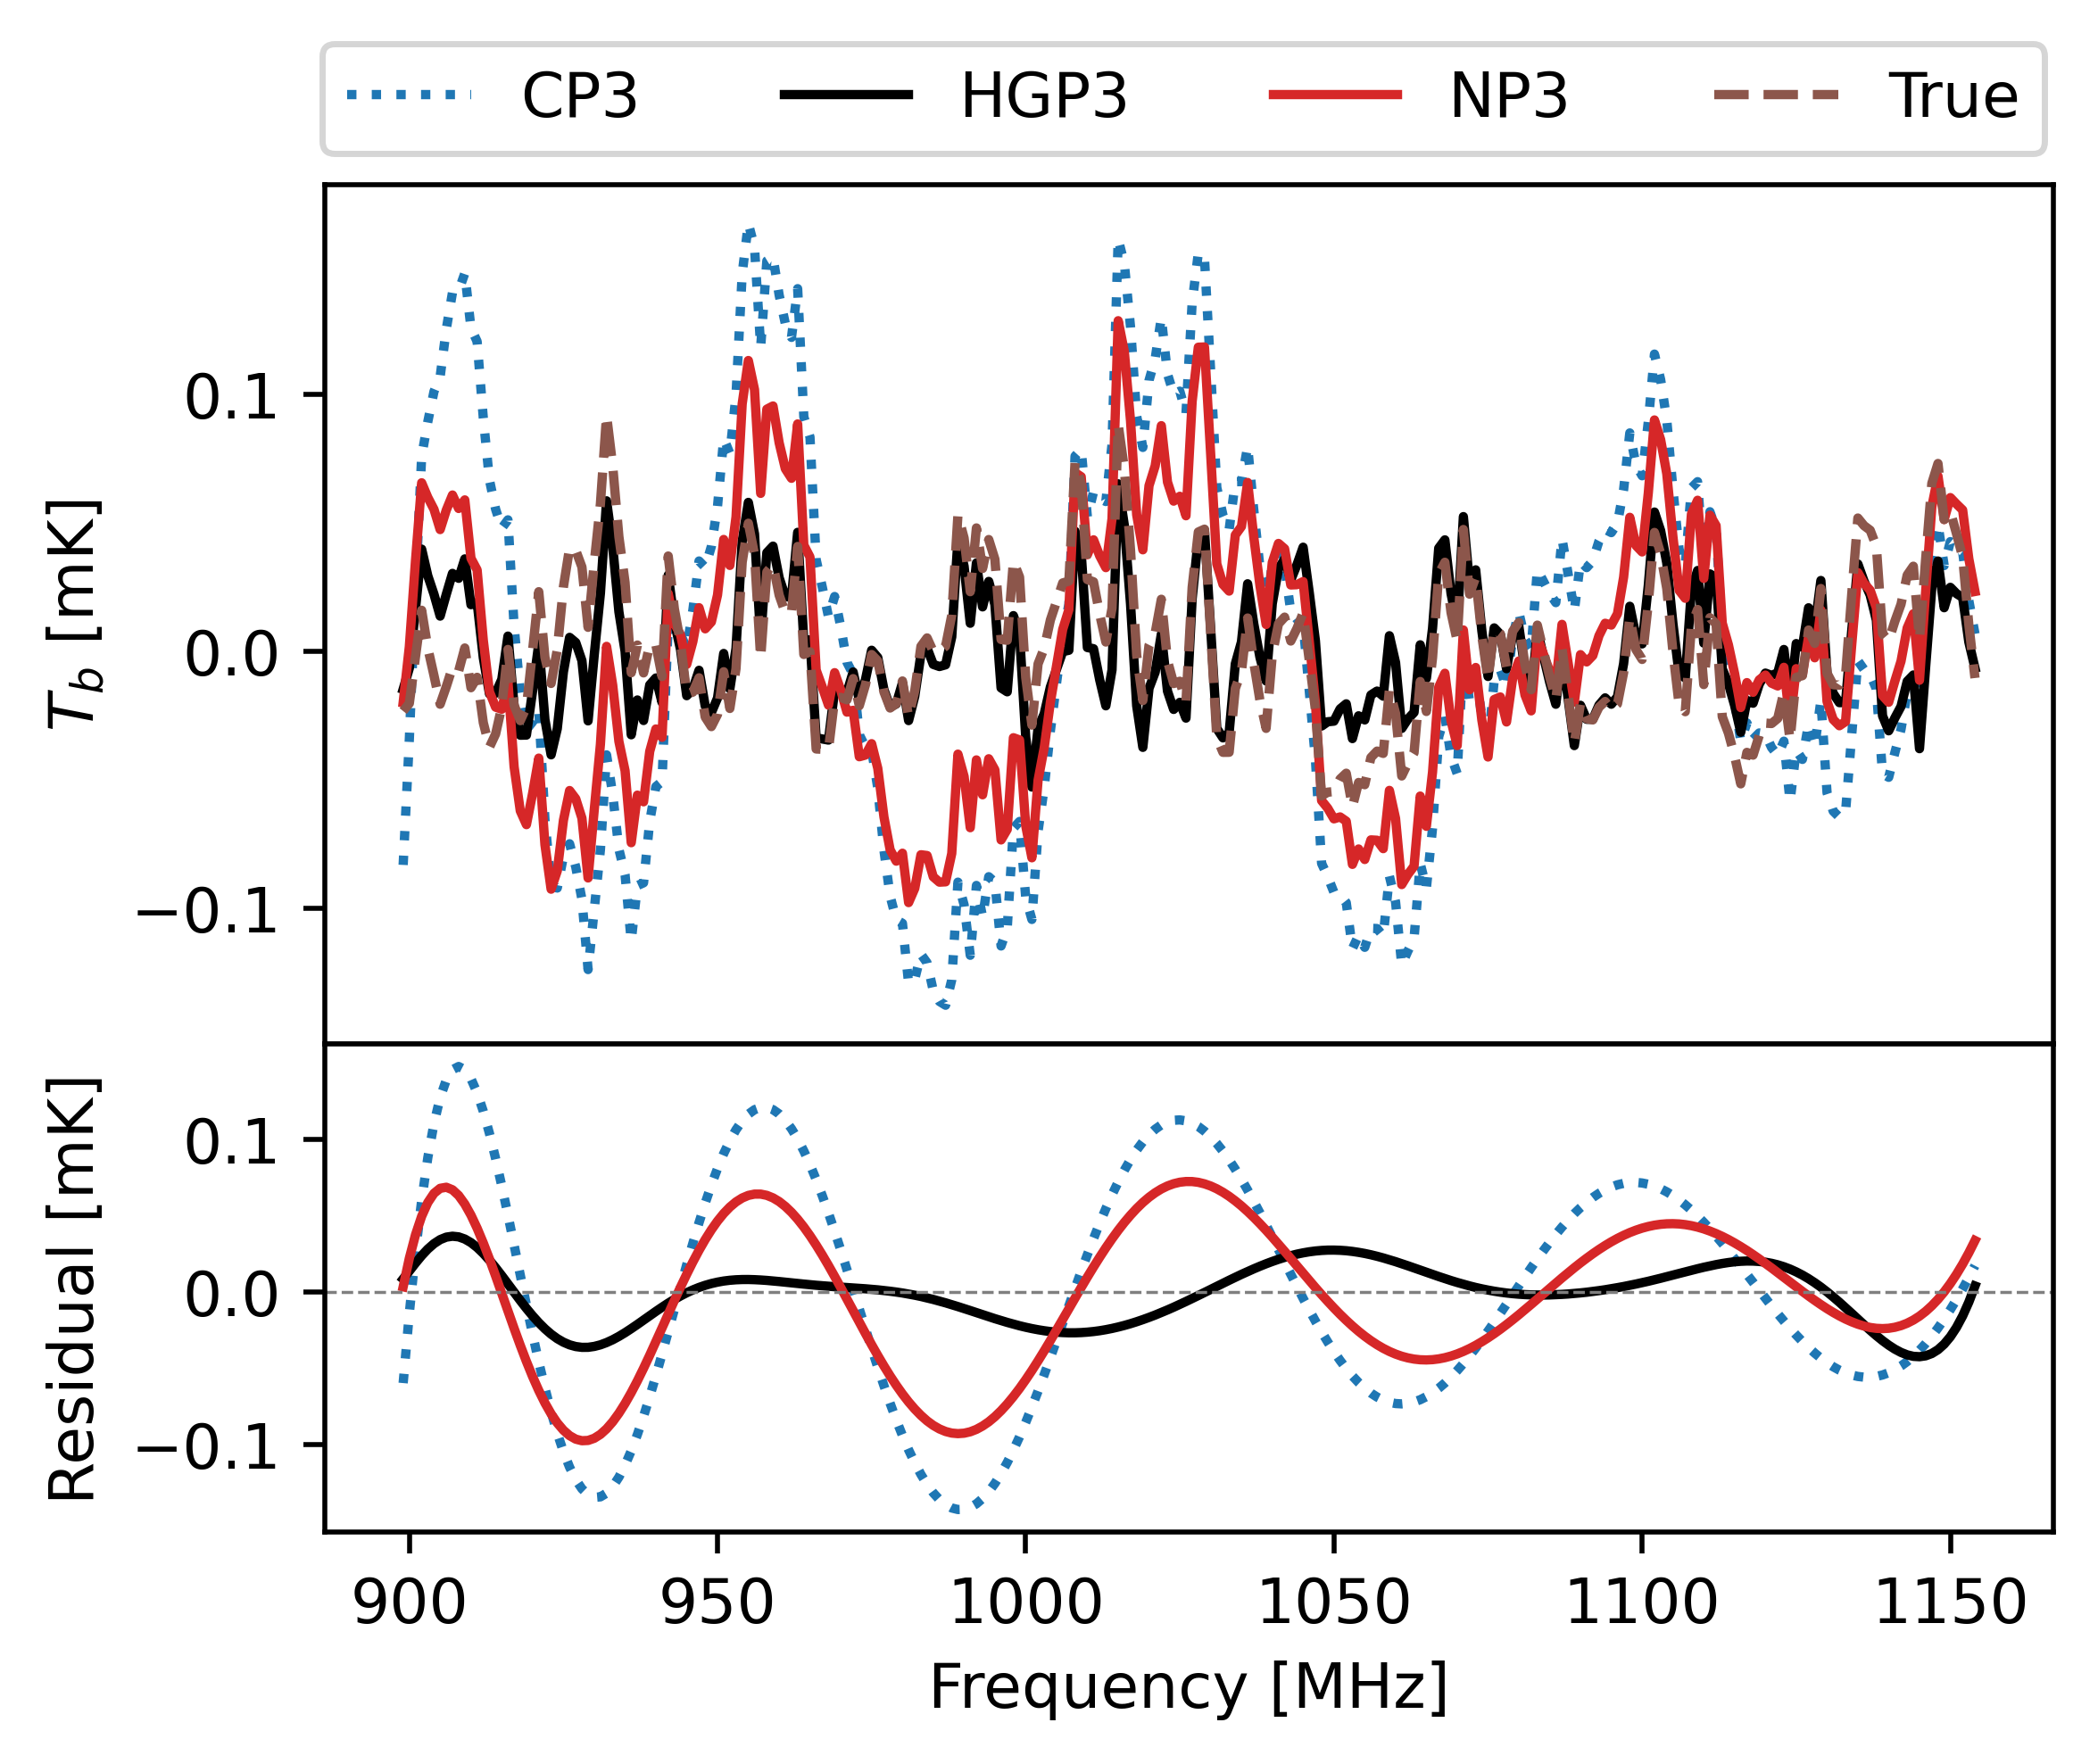

In [6]:
i=5 # x coordinate
j=245# y coordinate

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex='col', 
                                                       figsize=(5,4), gridspec_kw={'height_ratios': [3, 1.7]},dpi=500)
fig.subplots_adjust(hspace=0, wspace=0.38)
X = data.freqs[0:256]

ax1.plot(X,pred_CP[i,j,:],linestyle=':',label = 'CP3')
ax1.plot(X,pred_HGP[i,j,:],label = 'HGP3',color = 'black')
ax1.plot(X,pred_NP[i,j,:],label = 'NP3',color = 'tab:red')
#plt.fill_between(X,NP_sig[0,0,250,:],NP_sig[1,0,250,:],color = 'tab:red',alpha=0.4)
ax1.plot(X,cosmos[i,j,:],linestyle='--',color = '#8c564b',label = 'True')

ax1.set_ylabel('$T_{b}$ [mK]')

ax2.plot(X,pred_CP[i,j,:]-cosmos[i,j,:],linestyle=':')
ax2.plot(X,pred_HGP[i,j,:]-cosmos[i,j,:],color = 'black')
ax2.plot(X,pred_NP[i,j,:]-cosmos[i,j,:],color = 'tab:red')
xlims = ax2.get_xlim()
ax2.axhline(0.0,0,1,color = 'tab:grey',linewidth=0.5,linestyle = '--')
#plt.fill_between(X,NP_sig[0,0,250,:],NP_sig[1,0,250,:],color = 'tab:red',alpha=0.4)

ax2.set_ylabel(r'Residual [mK]')
ax2.set_xlabel('Frequency [MHz]')

fig.legend(bbox_to_anchor=(0.11, 0.88, 0.8, 0), loc="lower left", mode="expand", ncol=4, fontsize=10)
#plt.savefig('Comparison.pdf',dpi=500,bbox_inches='tight')

In [ ]:
NP_sig = np.percentile(np.load('/scratch/dkn16/result_np_pol_suppix1.npy')+np.load('/scratch/dkn16/result_np_pol_bias_mean.npy'),[16,84],axis=0)
HGP_sig = np.percentile(np.load('/scratch/dkn16/result_hgp_pol.npy')+np.load('/scratch/dkn16/result_hgp_pol_bias.npy'),[16,84],axis=0)


#plot the uncertainty
from matplotlib import rcParams
rcParams.update({'font.size':'12'})
fig = plt.figure(figsize=(8,3),dpi=300)
plt.subplot(122)
plt.imshow((NP_sig[1]-NP_sig[0])[:,:,120]*500,vmax=np.std((NP_sig[1]-NP_sig[0]))*1500)
plt.title('NP3',fontsize=14)
plt.axis('off')


plt.subplot(121)
im3 = plt.imshow((HGP_sig[1]-HGP_sig[0])[:,:,120]*500,vmax=np.std((NP_sig[1]-NP_sig[0]))*1500)
plt.title('HGP3',fontsize=14)
plt.axis('off')

l = 0.103
b = -0.05
w = 0.805
h = 0.062
#对应 l,b,w,h；设置colorbar位置；
rect = [l,b,w,h] 
cbar_ax = fig.add_axes(rect)
cbar=fig.colorbar(im3,cax = cbar_ax,orientation='horizontal')
cbar.set_label(r"$\sigma_{T_{\rm b}}$ [mK]",fontsize=14)

plt.tight_layout(h_pad=3.5)
#plt.savefig('Uncertainty.pdf',dpi=500,bbox_inches='tight')

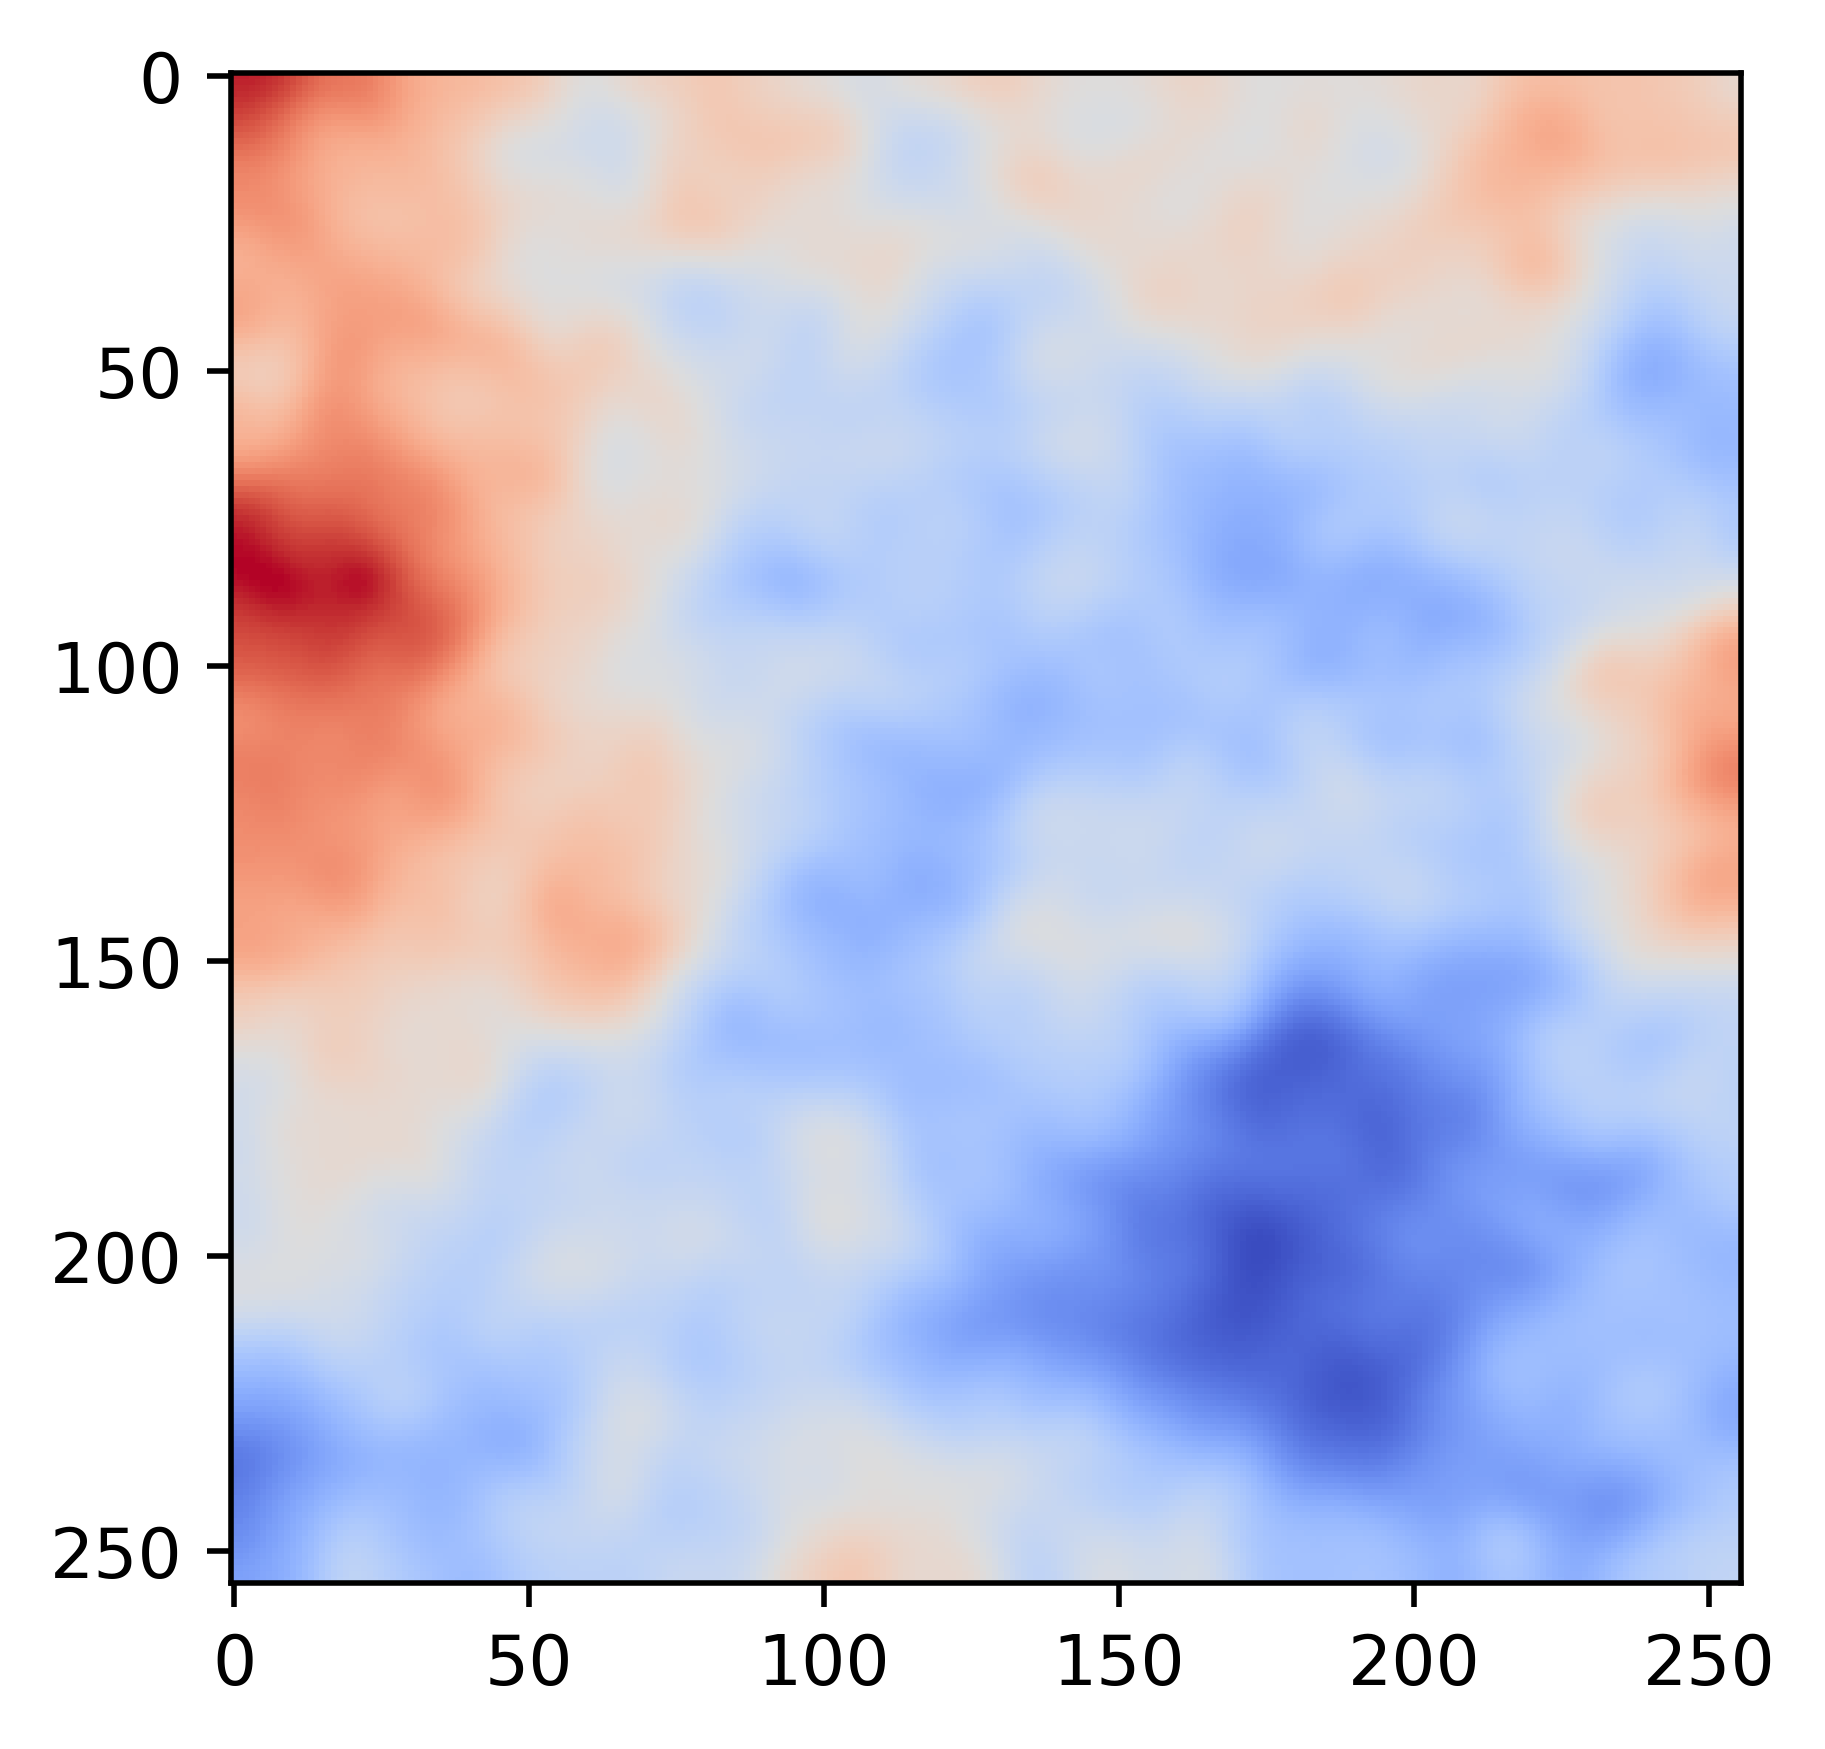

In [5]:
#draw the illustration of foreground
plt.figure(dpi=500)
plt.imshow((FGnopol+FGpol)[:,:,120],cmap='coolwarm')

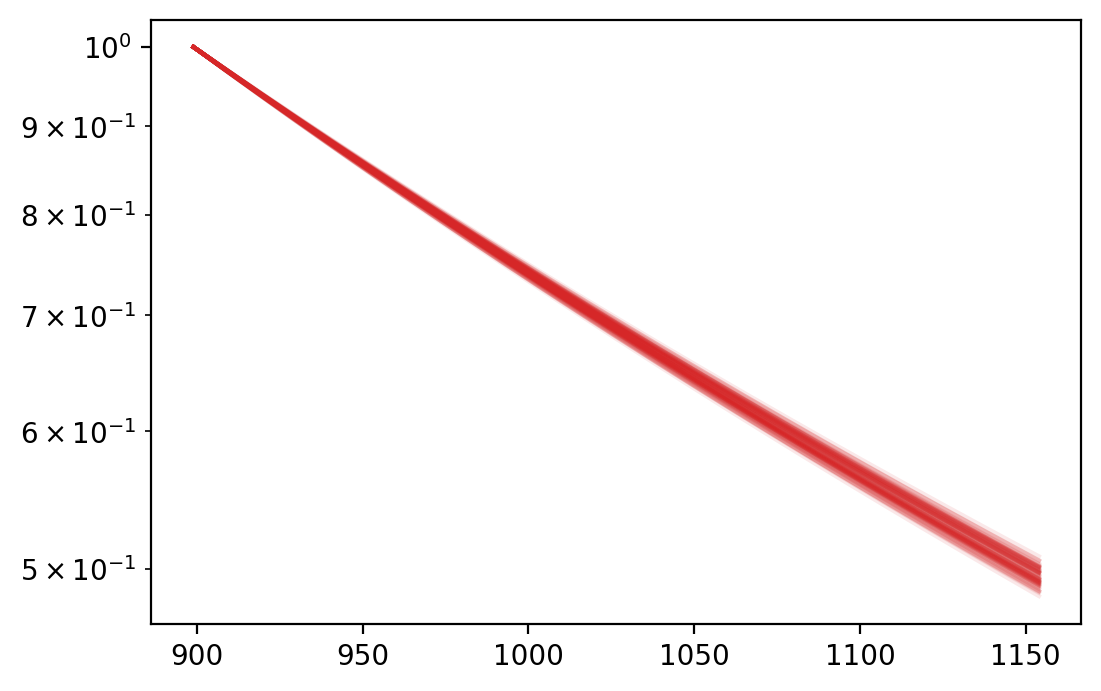

In [11]:
#normalised foreground
plt.figure(dpi=200)
for i in range(10):
    for j in range(10):
        plt.semilogy(freqs[0:256],(FGnopol+FGpol)[25*i,25*j,0:256]/(FGnopol+FGpol)[25*i,25*j,0],color='tab:red',alpha=0.1)